<a href="https://colab.research.google.com/github/YounSooKimTech/Coding_Test_202312/blob/main/Code_JoyKim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Joy Kim


# Reference Papers:
- Saelee, R., Zell, E., Murthy, B. P., Castro-Roman, P., Fast, H., Meng, L., ... & Murthy, N. (2022). Disparities in COVID-19 vaccination coverage between urban and rural counties—United States, December 14, 2020–January 31, 2022. Morbidity and Mortality Weekly Report, 71(9), 335.

- Lomeli, A., Escoto, A. A., Reyes, B., Burola, M. L. M., Tinoco-Calvillo, S., Villegas, I., ... & Seifert, M. (2023). Factors associated with COVID-19 vaccine uptake in a US/Mexico border community: demographics, previous influenza vaccination, and trusted sources of health information. Frontiers in Public Health, 11.

# Data Simulation

In [2]:
# Create baseline data through a random process.
# The ratios (p) of demographic variables are determined from the American Community Survey or the US Census Dataset.

import pandas as pd
import numpy as np

np.random.seed(123)

baseline = pd.DataFrame({
    'ID': range(1, 5001),
    'Age': np.random.randint(18, 65, 5000),
    'Sex': np.random.choice(['Male', 'Female'], 5000, p=[0.5, 0.5]),
    'Ethnicity': np.random.choice(["White", "Black", "Latino", "Asian", "Others"], 5000, p=[0.6, 0.12, 0.19, 0.06, 0.03]),
    "University_Degree": np.random.choice(["No","Yes"], 5000,p=[0.7, 0.3]),
    'Flu_Vaccination_History': np.random.choice(['No', 'Yes'], 5000, p=[0.5, 0.5]),
    'Living_Area': np.random.choice(['Rural', 'Urban'], 5000, p=[0.2, 0.8])
})

baseline.head()

baseline.to_csv("baseline_dataset.csv", index=False)

In [3]:
# Random assignment:
# Participants are equally randomly assigned to the reason, emotion, and control groups.

random_assignment = pd.DataFrame({
    'ID': range(1, 5001),
    'Group': np.random.choice(['Reason', 'Emotion', 'Control'], 5000, p=[1/3, 1/3, 1/3])
})

random_assignment["Group"].value_counts()

random_assignment.to_csv("random_assignment_dataset.csv", index=False)

In [4]:
# Two dependent variables (DVs) are used.
# Likelihood represents the intention of behavior, where 5 indicates the highest likelihood of vaccination and 1 indicates the least likelihood.
# Actual Vaccination represents the behavior of getting vaccinated within one year.
# It is assumed that this study can include a follow-up with up to 4500 people.

endline = pd.DataFrame({
    "ID":np.random.choice(range(1, 5001), 4500, replace=False),
    "Likelihood":np.random.randint(1, 6, 4500),
    "Actual_Vaccination":np.random.choice([1, 0], 4500),
})

endline["Likelihood"].value_counts()

endline.to_csv("endline_dataset.csv", index=False)

# Merging the datasets

In [5]:
# I merged the three datasets based on ID.
# I dropped the 500 participants who failed to complete the endline survey

temp = baseline.merge(random_assignment, on="ID")
df = endline.merge(temp, on="ID", how="inner").sort_values(by="ID", ascending=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 197 to 2839
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       4500 non-null   int64 
 1   Likelihood               4500 non-null   int64 
 2   Actual_Vaccination       4500 non-null   int64 
 3   Age                      4500 non-null   int64 
 4   Sex                      4500 non-null   object
 5   Ethnicity                4500 non-null   object
 6   University_Degree        4500 non-null   object
 7   Flu_Vaccination_History  4500 non-null   object
 8   Living_Area              4500 non-null   object
 9   Group                    4500 non-null   object
dtypes: int64(4), object(6)
memory usage: 386.7+ KB


,ID,Likelihood,Actual_Vaccination,Age,Sex,Ethnicity,University_Degree,Flu_Vaccination_History,Living_Area,Group
197,2,2,1,20,Male,White,No,No,Urban,Emotion
1286,4,4,0,52,Female,White,No,No,Urban,Control
1824,5,5,0,56,Male,Latino,Yes,Yes,Urban,Reason
2680,7,4,0,37,Male,White,Yes,No,Urban,Emotion
2647,10,2,1,51,Male,Others,No,No,Urban,Emotion


In [6]:
df.groupby('Group')["Likelihood"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
Control,1542.0,3.03,1.39,1.0,2.0,3.0,4.0,5.0
Emotion,1515.0,3.06,1.42,1.0,2.0,3.0,4.0,5.0
Reason,1443.0,2.99,1.42,1.0,2.0,3.0,4.0,5.0


In [7]:
df.groupby("Group")["Actual_Vaccination"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
Control,1542.0,0.50,0.5,0.0,0.0,1.0,1.0,1.0
Emotion,1515.0,0.49,0.5,0.0,0.0,0.0,1.0,1.0
Reason,1443.0,0.50,0.5,0.0,0.0,0.0,1.0,1.0


# Analysis

## ANOVA test

               sum_sq      df         F    PR(>F)
Group        3.272569     2.0  0.821957  0.439636
Residual  8952.255209  4497.0       NaN       NaN 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Control Emotion   0.0283 0.8445 -0.0914 0.1479  False
Control  Reason  -0.0381 0.7413 -0.1593 0.0831  False
Emotion  Reason  -0.0664 0.4072  -0.188 0.0553  False
----------------------------------------------------- 



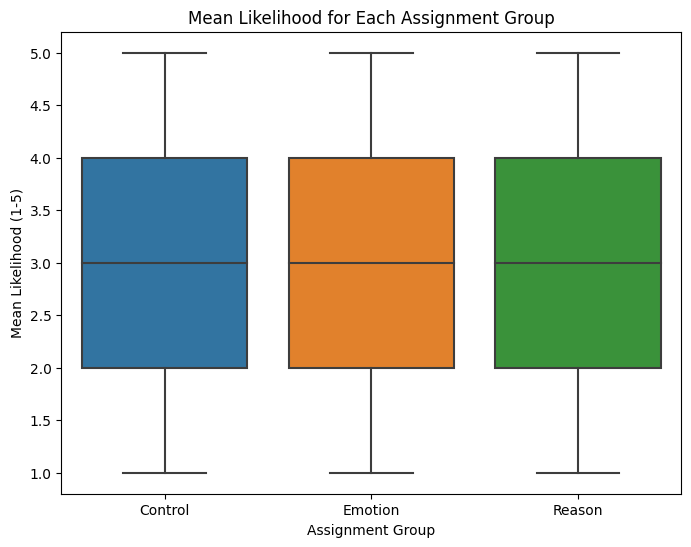

In [8]:
# ANOVA Test for Intention

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

# ANOVA test
model = ols('Likelihood ~ Group', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table, "\n")

# posthoc
posthoc = pairwise_tukeyhsd(df['Likelihood'], df['Group'], alpha=0.05)
print(posthoc, "\n")


# Graph for ANOVA
plt.figure(figsize=(8, 6))
order = ['Control', 'Emotion', 'Reason']
sns.boxplot(x='Group', y='Likelihood', data=df, order=order)

plt.title('Mean Likelihood for Each Assignment Group')
plt.xlabel('Assignment Group')
plt.ylabel('Mean Likelihood (1-5)')
plt.show()

               sum_sq      df         F    PR(>F)
Group        0.115766     2.0  0.231404  0.793429
Residual  1124.873345  4497.0       NaN       NaN 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Control Emotion  -0.0121 0.7803 -0.0546 0.0303  False
Control  Reason  -0.0042 0.9709 -0.0472 0.0387  False
Emotion  Reason   0.0079 0.9033 -0.0352  0.051  False
----------------------------------------------------- 



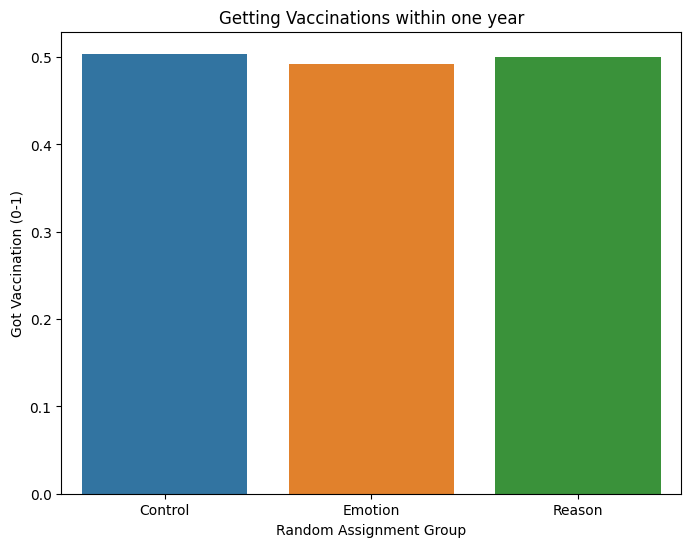

In [9]:
# ANOVA test for Behavior

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt

# ANOVA test

model = ols('Actual_Vaccination ~ Group', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table, "\n")

# posthoc
posthoc = pairwise_tukeyhsd(df['Actual_Vaccination'], df['Group'], alpha=0.05)
print(posthoc, "\n")

# Graph for ANOVA
plt.figure(figsize=(8, 6))
order = ['Control', 'Emotion', 'Reason']

sns.barplot(x='Group', y='Actual_Vaccination', data=df, estimator=np.mean, errorbar=None, order=order)

plt.title('Getting Vaccinations within one year')
plt.xlabel('Random Assignment Group')
plt.ylabel('Got Vaccination (0-1)')
plt.show()

## Regression Test

In [10]:
df.head()

,ID,Likelihood,Actual_Vaccination,Age,Sex,Ethnicity,University_Degree,Flu_Vaccination_History,Living_Area,Group
197,2,2,1,20,Male,White,No,No,Urban,Emotion
1286,4,4,0,52,Female,White,No,No,Urban,Control
1824,5,5,0,56,Male,Latino,Yes,Yes,Urban,Reason
2680,7,4,0,37,Male,White,Yes,No,Urban,Emotion
2647,10,2,1,51,Male,Others,No,No,Urban,Emotion


In [11]:
# Dummy code the variable into 0 (no) or 1 (yes)
# To decrease the number of variables, ethnicity is coded as White(1) vs. Non-white(0)
# Living area is coded as 0, rurla, or 1, urban

df["D_Sex"] = df["Sex"].map({"Male":0, "Female":1})
df["D_Flu_Vaccination_History"] = df["Flu_Vaccination_History"].map({"No":0, "Yes":1})
df["D_Living_Area"] = df["Living_Area"].map({"Rural":0, "Urban":1})
df["D_University_Degree"] = df["University_Degree"].map({"No":0, "Yes":1})
df['D_White'] = df['Ethnicity'].apply(lambda x: 1 if x == 'White' else 0)

df.head()

,ID,Likelihood,Actual_Vaccination,Age,Sex,Ethnicity,University_Degree,Flu_Vaccination_History,Living_Area,Group,D_Sex,D_Flu_Vaccination_History,D_Living_Area,D_University_Degree,D_White
197,2,2,1,20,Male,White,No,No,Urban,Emotion,0,0,1,0,1
1286,4,4,0,52,Female,White,No,No,Urban,Control,1,0,1,0,1
1824,5,5,0,56,Male,Latino,Yes,Yes,Urban,Reason,0,1,1,1,0
2680,7,4,0,37,Male,White,Yes,No,Urban,Emotion,0,0,1,1,1
2647,10,2,1,51,Male,Others,No,No,Urban,Emotion,0,0,1,0,0


In [12]:
# OLS for intention (1-5 scale)

import statsmodels.api as sm

formula = 'Likelihood ~ Group + Age + D_Sex + D_White + D_Flu_Vaccination_History + D_Living_Area + D_University_Degree'
model = sm.OLS.from_formula(formula, data=df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Likelihood   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5651
Date:                Mon, 11 Dec 2023   Prob (F-statistic):              0.807
Time:                        03:54:23   Log-Likelihood:                -7931.4
No. Observations:                4500   AIC:                         1.588e+04
Df Residuals:                    4491   BIC:                         1.594e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [13]:
# Due to the binary nature of the actual behavior variable (0 or 1), I used logistic regression.

import statsmodels.api as sm

formula = 'Actual_Vaccination	~ Group + Age + D_Sex + D_White + D_Flu_Vaccination_History + D_Living_Area + D_University_Degree'
model = sm.Logit.from_formula(formula, data=df).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.692439
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:     Actual_Vaccination   No. Observations:                 4500
Model:                          Logit   Df Residuals:                     4491
Method:                           MLE   Df Model:                            8
Date:                Mon, 11 Dec 2023   Pseudo R-squ.:                0.001014
Time:                        03:54:23   Log-Likelihood:                -3116.0
converged:                       True   LL-Null:                       -3119.1
Covariance Type:            nonrobust   LLR p-value:                    0.6107
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.0300      0.135     -0.222      0.824      -0.